In [209]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import seaborn as sns
import json
import numpy as np
from citipy import citipy
import random

# Save config information.
from config import api_key
import openweathermapy.core as owm

In [210]:
# # Import CSV file-- tried to use a list of cities to mitigate the bias of picking random cities nearer to the water...
# city_csv = "../weather/worldcities.csv"
# city_pd = pd.read_csv(city_csv)


# n_samples = 500
# cities = []


# for i, line in enumerate(city_pd):
#     if i < n_samples:
#         cities.append(line)
#     elif random.random() < n_samples * 1. / (i+1):
#             samples[random.randint(0, n_samples-1)] = line
            


In [211]:

iterator = 1
total_cities = 1000

city_name_list = []
country_code_list = []

while iterator <= total_cities:

    # Generate random city
    lat = random.uniform(-90, 90)
    lon = random.uniform(-180, 180)
    city = citipy.nearest_city(lat, lon)
    country_code = city.country_code
    name = city.city_name
    city_name_list.append(name)
    country_code_list.append(country_code)
    
    iterator += 1
    

In [212]:
# #I can de-duplicate the cities but im not sure how to manipulate it such that that countries are included
# deduped_cities = []
# for city in city_list:
#     if city not in deduped_cities:
#         deduped_cities.append(city)
        
        

In [213]:
# new_cities = pd.DataFrame(deduped_cities)
# new_cities.columns = ["City"]

# # I have tried deduping but I get an error saying "If using all scalar values, you must pass an index"




In [214]:
city_dict = {"City": city_name_list,
            "Country": country_code_list}
city_pd = pd.DataFrame(city_dict)
city_pd["Latitude"] = ""
city_pd["Longitude"] = ""
city_pd["Temperature"] = ""
city_pd["Humidity"] = ""
city_pd["Wind Speed"] = ""
city_pd["Cloudiness"] = ""
city_pd.columns


Index(['City', 'Country', 'Latitude', 'Longitude', 'Temperature', 'Humidity',
       'Wind Speed', 'Cloudiness'],
      dtype='object')

In [215]:

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

count = 1

# Loop through the cities_pd and run a lat/long search for each city
for index, row in city_pd.iterrows():

    city = row['City']
    country = row['Country']
    
    #Get weather data
    weather_response = requests.get(query_url + city + "," + country)
    weather_json = weather_response.json()
    
    print(f"Requesting current weather data for city #{count} {city}, {country}  ")
    print("URL: "+ weather_response.url)
    print()
    
    try:
        city_pd.at[index, "Latitude"] = weather_json['coord']['lat']
        city_pd.at[index, "Longitude"] = weather_json['coord']['lon']
        city_pd.at[index, "Temperature"] = weather_json['main']['temp']
        city_pd.at[index, "Humidity"] = weather_json['main']['humidity']
        city_pd.at[index, "Wind Speed"] = weather_json['wind']['speed']
        city_pd.at[index, "Cloudiness"] = weather_json['clouds']['all']
    
    except (KeyError):
        print("Missing field/result... skipping.")
        print()
        
    count += 1
    

Requesting current weather data for city #1 port alfred, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20alfred,za

Requesting current weather data for city #2 port macquarie, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20macquarie,au

Requesting current weather data for city #3 red bluff, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=red%20bluff,us

Requesting current weather data for city #4 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf

Requesting current weather data for city #5 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar

Requesting current weather data for city #6 east london, za  
URL: http://api.

Requesting current weather data for city #46 usumatlan, gt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=usumatlan,gt

Requesting current weather data for city #47 vaini, to  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vaini,to

Requesting current weather data for city #48 jamestown, sh  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jamestown,sh

Requesting current weather data for city #49 souillac, mu  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=souillac,mu

Requesting current weather data for city #50 faanui, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=faanui,pf

Requesting current weather data for city #51 corinto, ni  
URL: http://api.openweathermap.org/data/2.

Requesting current weather data for city #90 bodden town, ky  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bodden%20town,ky

Requesting current weather data for city #91 nizhneyansk, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nizhneyansk,ru

Missing field/result... skipping.

Requesting current weather data for city #92 taolanaro, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro,mg

Missing field/result... skipping.

Requesting current weather data for city #93 emerald, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=emerald,au

Requesting current weather data for city #94 chaihe, cn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chaihe,cn

Requesting curr

Requesting current weather data for city #137 barentsburg, sj  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barentsburg,sj

Missing field/result... skipping.

Requesting current weather data for city #138 hermanus, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus,za

Requesting current weather data for city #139 talara, pe  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=talara,pe

Requesting current weather data for city #140 tutoia, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tutoia,br

Requesting current weather data for city #141 port hardy, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=port%20hardy,ca

Requesting current weather data for city #142 murga

Requesting current weather data for city #182 kodiak, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kodiak,us

Requesting current weather data for city #183 santiago, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=santiago,cl

Requesting current weather data for city #184 bilma, ne  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bilma,ne

Requesting current weather data for city #185 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar

Requesting current weather data for city #186 iquique, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=iquique,cl

Requesting current weather data for city #187 mchinji, mw  
URL: http://api.openweathermap.org/data/2.5/

Requesting current weather data for city #230 weston, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=weston,us

Requesting current weather data for city #231 barentsburg, sj  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barentsburg,sj

Missing field/result... skipping.

Requesting current weather data for city #232 kaitangata, nz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kaitangata,nz

Requesting current weather data for city #233 coahuayana, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=coahuayana,mx

Requesting current weather data for city #234 taolanaro, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro,mg

Missing field/result... skipping.

Requesti

Requesting current weather data for city #275 mataura, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mataura,pf

Missing field/result... skipping.

Requesting current weather data for city #276 saint-georges, gf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-georges,gf

Missing field/result... skipping.

Requesting current weather data for city #277 lagoa, pt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lagoa,pt

Requesting current weather data for city #278 castro, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=castro,cl

Requesting current weather data for city #279 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar

Requesting current weath

Requesting current weather data for city #318 langue, hn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=langue,hn

Requesting current weather data for city #319 ribeira grande, pt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ribeira%20grande,pt

Requesting current weather data for city #320 cabo san lucas, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cabo%20san%20lucas,mx

Requesting current weather data for city #321 busselton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=busselton,au

Requesting current weather data for city #322 puerto ayora, ec  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=puerto%20ayora,ec

Requesting current weather data for city #323 tazovs

Requesting current weather data for city #363 candelaria, cu  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=candelaria,cu

Requesting current weather data for city #364 taolanaro, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro,mg

Missing field/result... skipping.

Requesting current weather data for city #365 butaritari, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari,ki

Requesting current weather data for city #366 lebu, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=lebu,cl

Requesting current weather data for city #367 nikolskoye, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nikolskoye,ru

Requesting current weather data for city #368 hua

Requesting current weather data for city #412 chuy, uy  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=chuy,uy

Requesting current weather data for city #413 castro, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=castro,cl

Requesting current weather data for city #414 belushya guba, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=belushya%20guba,ru

Missing field/result... skipping.

Requesting current weather data for city #415 yar-sale, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yar-sale,ru

Requesting current weather data for city #416 puerto ayora, ec  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=puerto%20ayora,ec

Requesting current weather data for city #417

Requesting current weather data for city #458 touros, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=touros,br

Requesting current weather data for city #459 cidreira, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cidreira,br

Requesting current weather data for city #460 busselton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=busselton,au

Requesting current weather data for city #461 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf

Requesting current weather data for city #462 castro, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=castro,cl

Requesting current weather data for city #463 prainha, br  
URL: http://api.openweathermap.org/dat

Requesting current weather data for city #503 uniontown, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=uniontown,us

Requesting current weather data for city #504 gibsons, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=gibsons,ca

Requesting current weather data for city #505 tuktoyaktuk, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tuktoyaktuk,ca

Requesting current weather data for city #506 bredasdorp, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bredasdorp,za

Requesting current weather data for city #507 attawapiskat, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=attawapiskat,ca

Missing field/result... skipping.

Requesting current weather data for c

Requesting current weather data for city #550 geraldton, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=geraldton,au

Requesting current weather data for city #551 severo-kurilsk, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=severo-kurilsk,ru

Requesting current weather data for city #552 takhtamygda, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=takhtamygda,ru

Requesting current weather data for city #553 tasiilaq, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tasiilaq,gl

Requesting current weather data for city #554 bengkulu, id  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=bengkulu,id

Missing field/result... skipping.

Requesting current weather data for

Requesting current weather data for city #597 vizinga, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=vizinga,ru

Requesting current weather data for city #598 visnes, no  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=visnes,no

Requesting current weather data for city #599 ponta delgada, pt  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ponta%20delgada,pt

Requesting current weather data for city #600 mount gambier, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mount%20gambier,au

Requesting current weather data for city #601 albany, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albany,au

Requesting current weather data for city #602 mataura, pf  
URL: http://api.

Requesting current weather data for city #646 barentsburg, sj  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=barentsburg,sj

Missing field/result... skipping.

Requesting current weather data for city #647 jaleswar, in  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jaleswar,in

Requesting current weather data for city #648 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar

Requesting current weather data for city #649 kaeo, nz  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kaeo,nz

Requesting current weather data for city #650 temaraia, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=temaraia,ki

Missing field/result... skipping.

Requesting current weath

Requesting current weather data for city #689 isangel, vu  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=isangel,vu

Requesting current weather data for city #690 jarjis, tn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=jarjis,tn

Missing field/result... skipping.

Requesting current weather data for city #691 houma, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=houma,us

Requesting current weather data for city #692 arraial do cabo, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=arraial%20do%20cabo,br

Requesting current weather data for city #693 mataura, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=mataura,pf

Missing field/result... skipping.

Requesting curre

Requesting current weather data for city #735 nanortalik, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=nanortalik,gl

Requesting current weather data for city #736 carberry, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=carberry,ca

Requesting current weather data for city #737 punta arenas, cl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=punta%20arenas,cl

Requesting current weather data for city #738 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf

Requesting current weather data for city #739 sakakah, sa  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=sakakah,sa

Missing field/result... skipping.

Requesting current weather data for city #740

Requesting current weather data for city #779 valdez, ec  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=valdez,ec

Requesting current weather data for city #780 taolanaro, mg  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=taolanaro,mg

Missing field/result... skipping.

Requesting current weather data for city #781 kapaa, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kapaa,us

Requesting current weather data for city #782 cherskiy, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=cherskiy,ru

Requesting current weather data for city #783 ushuaia, ar  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ushuaia,ar

Requesting current weather data for city #784 souillac, mu  
URL:

Requesting current weather data for city #825 butaritari, ki  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=butaritari,ki

Requesting current weather data for city #826 albany, au  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=albany,au

Requesting current weather data for city #827 yellowknife, ca  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=yellowknife,ca

Requesting current weather data for city #828 tecoanapa, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=tecoanapa,mx

Requesting current weather data for city #829 qaanaaq, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=qaanaaq,gl

Requesting current weather data for city #830 kodiak, us  
URL: http://api.openweath

Requesting current weather data for city #871 benguela, ao  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=benguela,ao

Requesting current weather data for city #872 ilulissat, gl  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=ilulissat,gl

Requesting current weather data for city #873 san patricio, mx  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=san%20patricio,mx

Requesting current weather data for city #874 pevek, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=pevek,ru

Requesting current weather data for city #875 kodiak, us  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kodiak,us

Requesting current weather data for city #876 port-gentil, ga  
URL: http://api.openweat

Requesting current weather data for city #916 berlevag, no  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=berlevag,no

Requesting current weather data for city #917 saint-philippe, re  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saint-philippe,re

Requesting current weather data for city #918 hermanus, za  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=hermanus,za

Requesting current weather data for city #919 xining, cn  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=xining,cn

Requesting current weather data for city #920 kutum, sd  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=kutum,sd

Requesting current weather data for city #921 qaqortoq, gl  
URL: http://api.openweather

Requesting current weather data for city #960 maragogi, br  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=maragogi,br

Requesting current weather data for city #961 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf

Requesting current weather data for city #962 soyo, ao  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=soyo,ao

Requesting current weather data for city #963 saskylakh, ru  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=saskylakh,ru

Requesting current weather data for city #964 rikitea, pf  
URL: http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=imperial&q=rikitea,pf

Requesting current weather data for city #965 mataura, pf  
URL: http://api.openweathermap.org/data/

In [216]:
city_pd.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,port alfred,za,-33.59,26.89,68.36,91,13.67,8
1,port macquarie,au,-31.43,152.91,64.4,88,4.83,75
2,red bluff,us,40.18,-122.24,62.6,77,3.36,75
3,rikitea,pf,-23.12,-134.97,80.06,100,10.54,24
4,ushuaia,ar,-54.81,-68.31,40.91,90,10.65,32


In [217]:
city_clean = city_pd[city_pd.Latitude != ""]
city_clean.head()

,City,Country,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,port alfred,za,-33.59,26.89,68.36,91,13.67,8
1,port macquarie,au,-31.43,152.91,64.4,88,4.83,75
2,red bluff,us,40.18,-122.24,62.6,77,3.36,75
3,rikitea,pf,-23.12,-134.97,80.06,100,10.54,24
4,ushuaia,ar,-54.81,-68.31,40.91,90,10.65,32


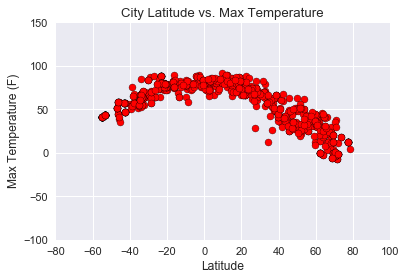

In [230]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style('darkgrid')
sns.color_palette(palette='bright')
# City Latitude vs. Humidity 
plt.title("Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.ylim(-100,150)
plt.xlim (-80,100)

lat = city_clean["Latitude"]
max_temp = city_clean["Temperature"]

plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black")

plt.savefig("City_Latitude_vs_Max_Temperature.png")

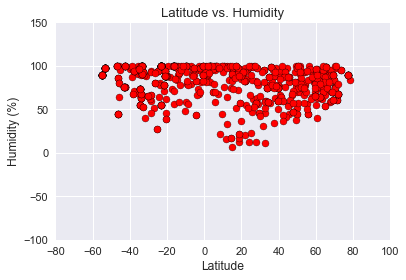

In [231]:
# City Latitude vs. Humidity 
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(-100,150)
plt.xlim (-80,100)

lat = city_clean["Latitude"]
max_temp = city_clean["Humidity"]

plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Latitude_vs_Humidity.png")

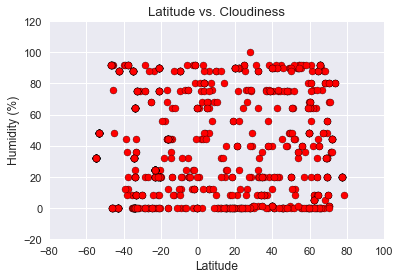

In [232]:
# City Latitude vs. Cloudiness
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.ylim(-20,120)
plt.xlim (-80,100)

lat = city_clean["Latitude"]
max_temp = city_clean["Cloudiness"]

plt.scatter(lat, max_temp, marker="o", facecolors="red", edgecolors="black")
plt.savefig("Latitude_vs_Cloudiness.png")